In [1]:
import pandas as pd

In [2]:
# Load file csv
df = pd.read_csv("GojekAppReview.csv")

# Ambil kolom
df = df[['content', 'score']].dropna()

# Mapping skor ke label 3 kelas
def map_score(score):
    if score <= 2:
        return "Negatif"
    else:
        return "Positif"

df['label'] = df['score'].apply(map_score)

In [3]:
# Ambil data latih 20.000 data
df_contoh = df.sample(n=20000, random_state=42)

In [4]:
# Oversampling kelas netral
positif = df_contoh[df_contoh['label'] == 'Positif']
negatif = df_contoh[df_contoh['label'] == 'Negatif']

print(df_contoh['label'].value_counts())

label
Positif    15098
Negatif     4902
Name: count, dtype: int64


In [5]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [6]:
X = df_contoh[['content']]
y = df_contoh['label']

# Split data
X_latih, X_tes, y_latih, y_tes = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi dan training model
model = CatBoostClassifier(
    iterations=200,
    learning_rate=0.1,
    depth=6,
    text_features=['content'],
    verbose=100,
    loss_function='MultiClass'
)

model.fit(X_latih, y_latih, text_features=['content'])

# Prediksi dan evaluasi
y_prediksi = model.predict(X_tes)
print(classification_report(y_tes, y_prediksi))


0:	learn: 0.6340619	total: 219ms	remaining: 43.6s
100:	learn: 0.2628153	total: 16.8s	remaining: 16.5s
199:	learn: 0.2484127	total: 31.8s	remaining: 0us
              precision    recall  f1-score   support

     Negatif       0.74      0.83      0.78       987
     Positif       0.94      0.90      0.92      3013

    accuracy                           0.89      4000
   macro avg       0.84      0.87      0.85      4000
weighted avg       0.89      0.89      0.89      4000



In [7]:
# Confusion Matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

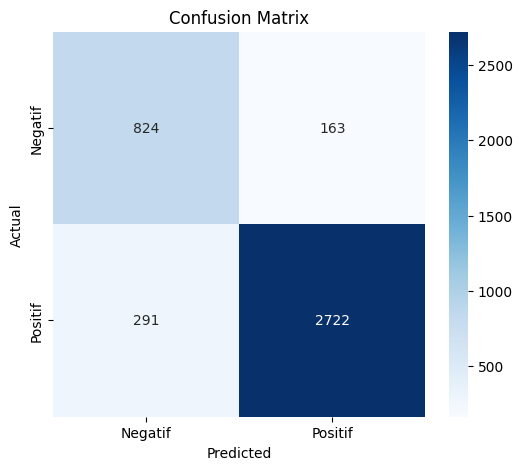

In [8]:
# Buat confusion matrix
cm = confusion_matrix(y_tes, y_prediksi, labels=["Negatif", "Positif"])

# Visualisasikan
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Negatif", "Positif"],
            yticklabels=["Negatif", "Positif"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [17]:
# Contoh ulasan yang ingin diuji
ulasan_baru = [
    "Makin lama gojek makin ngga jelas susah bgt dapet driver buat gofood ongkirnya juga mahal bgt Mohon diperbaiki",
    "Sekarang go food ngga pernah ada promo ongkirnya makin mahal aja",
    "Aplikasi biasa aja, kadang error kadang lancar"
]

# Buat DataFrame dari ulasan
df_ulasan_baru = pd.DataFrame({'content': ulasan_baru})

# Prediksi
hasil_prediksi = model.predict(df_ulasan_baru)

# Tampilkan hasil
for teks, label in zip(ulasan_baru, hasil_prediksi):
    print(f"Ulasan: {teks}\n→ Prediksi Sentimen: {label[0]}\n")

Ulasan: Makin lama gojek makin ngga jelas susah bgt dapet driver buat gofood ongkirnya juga mahal bgt Mohon diperbaiki
→ Prediksi Sentimen: Negatif

Ulasan: Sekarang go food ngga pernah ada promo ongkirnya makin mahal aja
→ Prediksi Sentimen: Negatif

Ulasan: Aplikasi biasa aja, kadang error kadang lancar
→ Prediksi Sentimen: Positif

